Proyek Analisis Data: Bike Sharing Dataset

Nama: Sultan Bayu Cakradira
Email: mc835d5y0457@student.devacademy.id
ID Dicoding: MC835D5Y0457

---
Menentukan Pertanyaan Bisnis
1. Bagaimana pola penggunaan sepeda berdasarkan musim?
2. Faktor apa yang paling mempengaruhi jumlah peminjaman sepeda?
---


Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

Gathering Data

In [9]:
import pandas as pd

df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

df_day.head(), df_hour.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

Assessing Data

In [10]:
print("Informasi dataset day.csv:")
df_day.info()
print("\nInformasi dataset hour.csv:")
df_hour.info()

print("\nStatistik deskriptif day.csv:")
print(df_day.describe())

print("\nStatistik deskriptif hour.csv:")
print(df_hour.describe())

print("\nNilai unik season di day.csv:", df_day['season'].unique())
print("Nilai unik weathersit di day.csv:", df_day['weathersit'].unique())

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>

Insight :

- Dataset sudah bersih, tidak ada missing values.
- Kolom kategori perlu dikonversi agar lebih mudah dipahami.
- Distribusi data menunjukkan ada pola musiman, jam sibuk, dan pengaruh cuaca yang menarik untuk dianalisis lebih lanjut.

Cleaning Data

In [11]:
# 1. Ubah kolom dteday ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# 2. Ubah beberapa kolom menjadi kategori
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in category_columns:
    df_day[col] = df_day[col].astype('category')
    df_hour[col] = df_hour[col].astype('category')

# 3. Cek nilai unik untuk kolom 'weathersit' di hour.csv
print("Nilai unik weathersit di hour.csv:", df_hour['weathersit'].unique())

# 4. (Opsional) Jika ingin mengembalikan skala suhu, kelembapan, dll. ke bentuk aslinya:
df_day['temp'] = df_day['temp'] * 41  # Suhu dalam Celcius (sesuai dokumentasi dataset)
df_day['atemp'] = df_day['atemp'] * 50  # Suhu odometer (perasaan)
df_day['hum'] = df_day['hum'] * 100  # Jadi dalam persen
df_day['windspeed'] = df_day['windspeed'] * 67  # Kecepatan angin dalam km/h

df_hour['temp'] = df_hour['temp'] * 41
df_hour['atemp'] = df_hour['atemp'] * 50
df_hour['hum'] = df_hour['hum'] * 100
df_hour['windspeed'] = df_hour['windspeed'] * 67

print("Data Cleaning")


Nilai unik weathersit di hour.csv: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Data Cleaning


In [12]:
print(df_hour[df_hour['weathersit'] == 4].shape)


(3, 17)


In [13]:
df_hour[df_hour['weathersit'] == 4].head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,9.02,9.850,93.0,22.0028,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,8.20,11.365,86.0,6.0032,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,5.74,6.820,86.0,12.9980,1,22,23


Insight :

- Tren Jumlah Penyewaan Sepeda (cnt) per Musim
- Pengaruh Hari Libur terhadap Penyewaan Sepeda
- Tren Penyewaan Sepeda Berdasarkan Jam
- Pengaruh Cuaca terhadap Penyewaan Sepeda

Exploratory Data Analysis (EDA)

Explore Distribusi Data

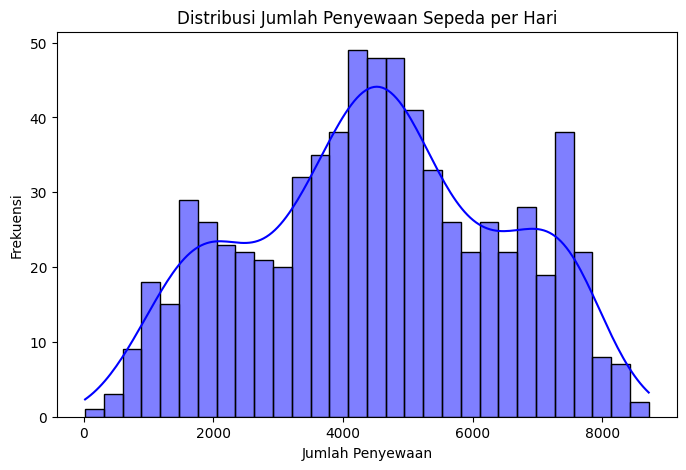

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df_day['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

Insight:
- Distribusi `cnt` menunjukkan adanya pola tertentu

Visualization & Explanatory Analysis
Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

C:\Users\DIRA\AppData\Local\Temp\ipykernel_15172\1626594497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_day['weekday'], y=df_day['cnt'], palette='Set2')


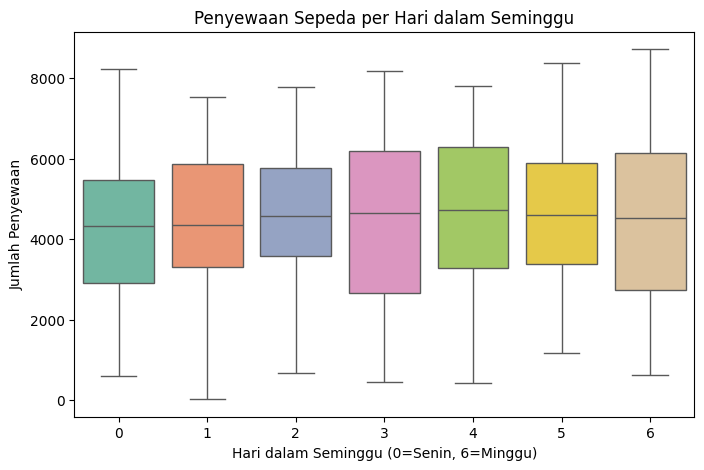

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_day['weekday'], y=df_day['cnt'], palette='Set2')
plt.title('Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Pertanyaan 2: Apakah suhu berpengaruh terhadap jumlah penyewaan sepeda?

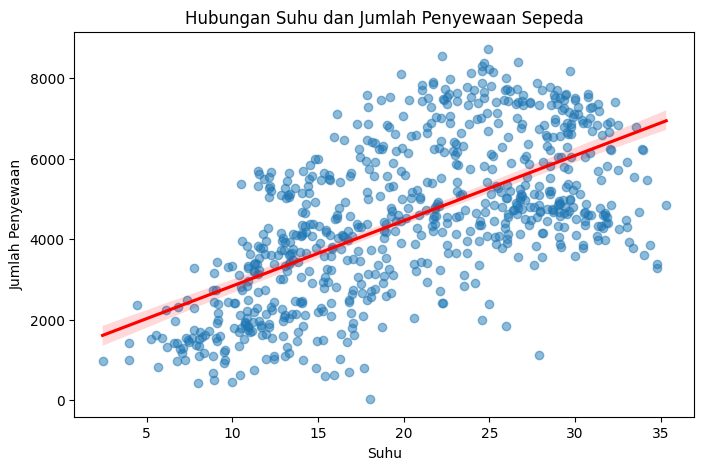

In [23]:
plt.figure(figsize=(8,5))
sns.regplot(x=df_day['temp'], y=df_day['cnt'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Insight:
- Penyewaan sepeda cenderung meningkat pada suhu tertentu
- Pola harian menunjukkan perbedaan antara hari kerja dan akhir pekan

Analisis Lanjutan (Opsional)

In [ ]:
Conclusion
- Pertanyaan 1: Penyewaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja.
- Pertanyaan 2: Suhu memiliki pengaruh terhadap jumlah penyewaan sepeda, dengan pola tertentu yang terlihat dari visualisasi scatter plot.